# Using Data Collected from the Kepler Telescope to Derive General Characteristics of Exoplanets and Predict Potential Exoplanets

$\textbf{Members: Anthony Sheu, Jeremy Qu, Andrea Alano, Sofie DeLuca}$

## Introduction

Kepler is a satellite telescope which has been collecting data about exoplanets, planets beyond our solar system, since 2009. The dataset records about 10 thousand data of the parameters of planets that are observed by Kepler, so this data will be valuable to estimate and categorize new planets. Our project will try to answer the question: Will this new object be an exoplanet or a false positive based on predictors? The dataset that will be used to answer the question is a table of Kepler Objects of Interest. The table indicates if these objects are either confirmed, false positive, or candidate exoplanets. It also includes properties of the objects such as radius, orbital period, transit duration, etc. 
    
We plan to first use visualization to derive specific general characteristics demonstrated by exoplanets. Then we will use these general characteristics as predictors in the K-nearest neighbours method to create a model that can predict whether a given planet with specified characteristics to be an exoplanet or not. We will plot the confirmed exoplanets and the false positive exoplanets on scatterplots against various predictors to see which predictors have significant patterns between the false positives and the confirmed exoplanets. We will split our data into training and testing, and then split it into 10 (or more but currently undecided) folds. 
 Our first step will be finding which predictions we want to use. We will plot the confirmed exoplanets and the false positive exoplanets on scatter plots against various predictors to see which predictors have significant patterns between the false positives and the confirmed exoplanets. We will split our data into training and testing, and then split it into 10 folds. Potentially we will use more folds if necessary. 

 We will be using a scatterplot to visualize our results, but depending on our findings we may use other methods as well as line plots, bar graphs, and histograms. Depending on which variables we analyze, we might use colour coding:  exoplanets that are false positives or confirmed are different colours. We expect to find significant patterns and similarities within the false positives, potentially through their size or some similar predictors. The implications of discovering these basic characteristics will prove to be immensely helpful in the future when we want to quickly and efficiently determine if an object could be an exoplanet. This could give us clues to philosophical questions such as "is there life beyond our quiet solar system?" or "are there other habitable planets aside from our own"? With the impending danger of climate change creeping up behind our backs, maybe is not such a stretch to start researching alternate ways to continute the posterity of the human race.



## Preliminary Exploratory Data Analysis

### Data Collected From
NASA. (2017, October 10). Kepler exoplanet search results. Kaggle. https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results/data 

### Tidy Data
The data is already in a tidy format where each row is one observation, each column is one variable, and each cell only has one value. Although the data is already tidy, we still need to comb through the columns and remove unnecessary variables.

### Variables of Interest
- kepid
- kepoi_name
- kepler_name
- koi_disposition
- koi_pdisposition
- koi_score
- koi_steff
- koi_slogg
- koi_srad
- etc.

### Reading in the Data

GitHub repo link for dataset: 
\
https://github.com/Anthony-Sheu/Kepler-Observations-Exoplanet-Prediction.git

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
exo_data = read_csv("cumulative.csv")

exo_data_select <- exo_data |>
    select(rowid, kepid, kepoi_name, koi_disposition, koi_pdisposition, koi_score, koi_period, koi_duration, koi_prad, koi_teq, koi_insol, koi_slogg, koi_steff, koi_srad) 

exo_data_select |> slice(1:10)

Rows: 9564 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): kepoi_name, kepler_name, koi_disposition, koi_pdisposition, koi_tc...
dbl (43): rowid, kepid, koi_score, koi_fpflag_nt, koi_fpflag_ss, koi_fpflag_...
lgl  (2): koi_teq_err1, koi_teq_err2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_duration,koi_prad,koi_teq,koi_insol,koi_slogg,koi_steff,koi_srad
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,9.488036,2.95750,2.26,793,93.59,4.467,5455,0.927
2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,54.418383,4.50700,2.83,443,9.11,4.467,5455,0.927
3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,1.78220,14.60,638,39.30,4.544,5853,0.868
4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.40641,33.46,1395,891.96,4.564,5805,0.791
5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,2.525592,1.65450,2.75,1406,926.16,4.438,6031,1.046
6,10872983,K00756.01,CONFIRMED,CANDIDATE,1.000,11.094321,4.59450,3.90,835,114.81,4.486,6046,0.972
7,10872983,K00756.02,CONFIRMED,CANDIDATE,1.000,4.134435,3.14020,2.77,1160,427.65,4.486,6046,0.972
8,10872983,K00756.03,CONFIRMED,CANDIDATE,0.992,2.566589,2.42900,1.59,1360,807.74,4.486,6046,0.972
9,6721123,K00114.01,FALSE POSITIVE,FALSE POSITIVE,0.000,7.361790,5.02200,39.21,1342,767.22,3.986,6227,1.958


### Visualization

We will perform one quick visualization of the koi_slogg against koi_teq. koi_teq is the approximation for the temperature of the planet, and koi_slogg is the base-10 logarithm of the acceleration due to gravity at the surface of the star. We also plan on dividing our data set up into testing/training data sets and folds, so just for this plot, we will pretend we have a training dataset of 500 observations.

In [3]:
exo_data_500 <- slice(exo_data_select, 1:500)

exo_count <- exo_data_500 |>
    group_by(koi_disposition) |>
    summarise(count = n())

exo_count

koi_disposition,count
<chr>,<int>
CANDIDATE,55
CONFIRMED,296
FALSE POSITIVE,149


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 10
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


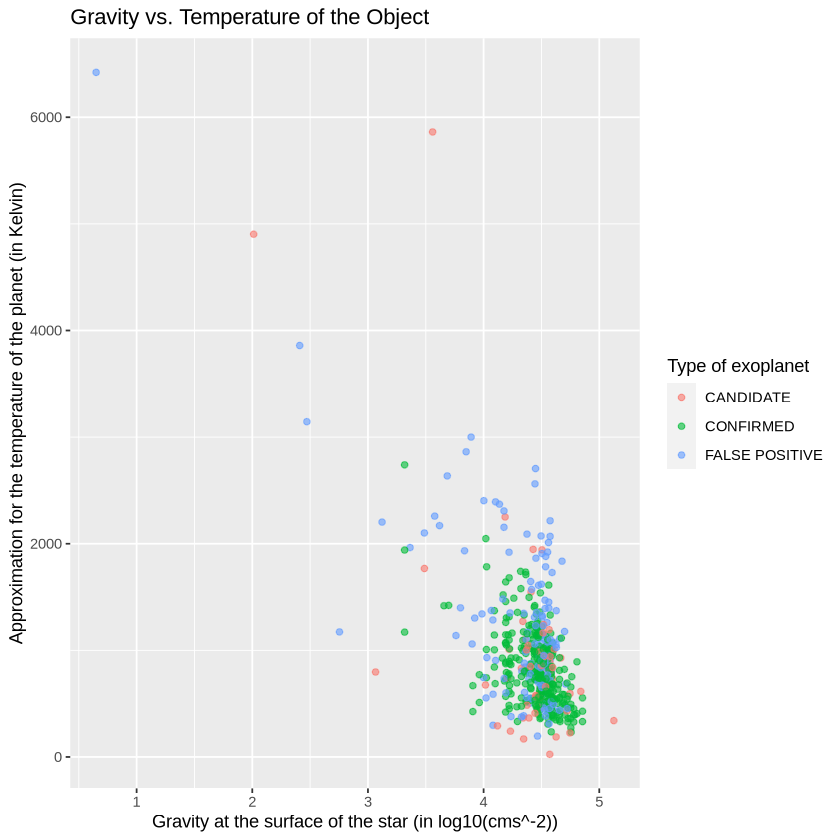

In [4]:
ex_plot <- exo_data_500 |>
    ggplot(aes(x = koi_slogg, y = koi_teq)) +
    geom_point(aes(colour = koi_disposition), alpha = 0.6) +
    xlab("Gravity at the surface of the star (in log10(cms^-2))") +
    ylab("Approximation for the temperature of the planet (in Kelvin)") +
    ggtitle("Gravity vs. Temperature of the Object") +
    labs(colour = "Type of exoplanet")
    theme(text = element_text(size = 10))

ex_plot

From our plot above, we see that we indeed do have a cluster of points in the lower bottom corner. Most of the green points, labeled "CONFIRMED", are present when the gravity is between 4 and 5, with the temperature being around 1000 to 1500. We now know that when using these variables as predictors, we want to look for gravity values between 4-5 $log10(\frac{cm}{s^2})$ and temperature between 1000-1500 K. The model created above is only one of the possibilities for predictors that will be used in our analysis to determine whether a Kepler Object of Interest is a confirmed exoplanet or if it is a false positive. In our analysis, we hope to make more models based on other predictors. In doing so, we will be able to see a more thorough trend in the physical classification of Kepler Objects and given any celestial object, predict whether or not it is an exoplanet.